<a href="https://colab.research.google.com/github/jcandane/StochasticPhysics/blob/main/basic_acq_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import stuff

because gpCAM requires an older version of numpy, be sure to restart the notebook after initial installation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

try:
    from gpcam.autonomous_experimenter import AutonomousExperimenterFvGP
except:
    !pip install gpcam==8.0.2
    from gpcam.autonomous_experimenter import AutonomousExperimenterFvGP

try:
    import torch
except:
    !pip install torch
    import torch

### import custom module !! might be modified in the future !!
try:
    from gpcam_test_instrument import gpcam_test_instrument
except:
    !wget https://github.com/jcandane/StochasticPhysics/raw/main/gpcam_test_instrument.py
    from gpcam_test_instrument import gpcam_test_instrument

# Tests

## Acquisition functions used

from https://gpcam.lbl.gov/examples/acquisition-functions

In [2]:
#available 12 acquisition functions:
acquisition_functions = ["variance","relative information entropy","relative information entropy set",
                        "ucb","lcb","maximum","minimum","gradient","expected improvement",
                         "probability of improvement", "target probability", "total correlation"]

## ("Instrument") Functions used

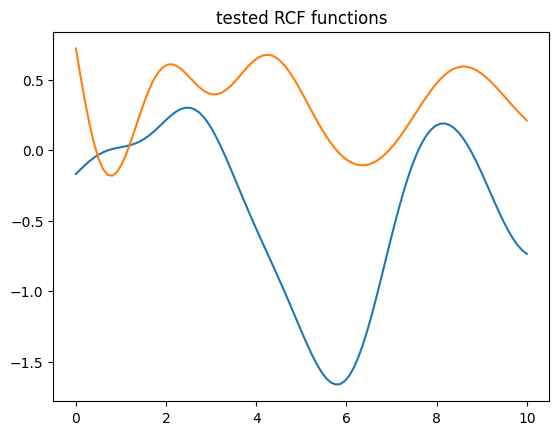

In [3]:
input_space         = np.array([[ 0.0, 10.0]])
number_of_functions = 2

apparatuses = [ gpcam_test_instrument(input_space, 12, D=1, ξ=2) for i in range(number_of_functions) ]

xs = np.linspace(input_space[0,0], input_space[0,1], 100)
ys = np.asarray([ f.rcf.evalulate(xs.reshape(-1,1)).reshape(-1) for f in apparatuses ]).T

plt.plot(xs, ys)
plt.title("tested RCF functions")
plt.show()

## Test Space

runs in about 6m

In [4]:
data_out=[]
for f in apparatuses:
    acq_data_out=[]
    for Acquisition_function in tqdm(acquisition_functions):
        my_experiment = AutonomousExperimenterFvGP(f.domain,
                                                    f.D, 1,
                                                    init_dataset_size=10,
                                                    instrument_function=f.test_instrumentt,
                                                    acquisition_function=Acquisition_function)
        my_experiment.train()
        my_experiment.go(10)

        acq_data_out.append( np.asarray([ my_experiment.x_data.flatten(), my_experiment.y_data.flatten() ]) )
    data_out.append(acq_data_out)

data_outt = np.asarray( data_out )
data_outt.shape ## (instruments, acquisition-functions, coordinate, data-points)

  0%|          | 0/12 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/fvgp/fvgp.py:293: UserWarning: Hyperparameter bounds have been initialized automatically                     
 for the default kernel in fvgp. They will automatically used for the training.                    
 However, you can also define and provide new bounds.
  warnings.warn("Hyperparameter bounds have been initialized automatically \
/usr/local/lib/python3.10/dist-packages/fvgp/fvgp.py:300: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  super().__init__(
100%|██████████| 12/12 [02:39<00:00, 13.31s/it]


(2, 12, 2, 10)

note acquisition-function should be in .go() class-function because it is only at this point we require the function!

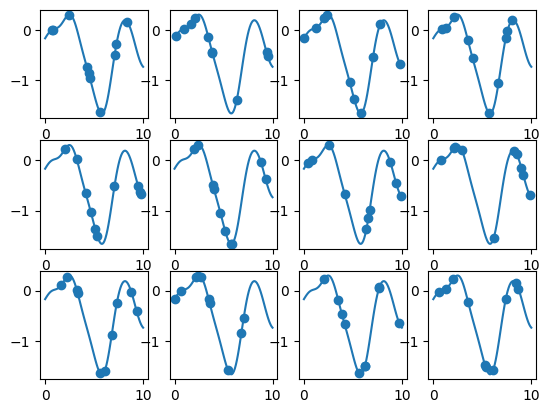

In [6]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(3, 4) ##, subplot_kw=dict(projection="polar")
axs[0, 0].scatter(data_outt[0, 0, 0], data_outt[0, 0, 1])
axs[0, 1].scatter(data_outt[0, 1, 0], data_outt[0, 1, 1])
axs[0, 2].scatter(data_outt[0, 2, 0], data_outt[0, 2, 1])
axs[0, 3].scatter(data_outt[0, 3, 0], data_outt[0, 3, 1])
axs[1, 0].scatter(data_outt[0, 4, 0], data_outt[0, 4, 1])
axs[1, 1].scatter(data_outt[0, 5, 0], data_outt[0, 5, 1])
axs[1, 2].scatter(data_outt[0, 6, 0], data_outt[0, 6, 1])
axs[1, 3].scatter(data_outt[0, 7, 0], data_outt[0, 7, 1])
axs[2, 0].scatter(data_outt[0, 8, 0], data_outt[0, 8, 1])
axs[2, 1].scatter(data_outt[0, 9, 0], data_outt[0, 9, 1])
axs[2, 2].scatter(data_outt[0, 10, 0], data_outt[0, 10, 1])
axs[2, 3].scatter(data_outt[0, 11, 0], data_outt[0, 11, 1])

axs[0, 0].plot(xs, ys[:,0])
axs[0, 1].plot(xs, ys[:,0])
axs[0, 2].plot(xs, ys[:,0])
axs[0, 3].plot(xs, ys[:,0])
axs[1, 0].plot(xs, ys[:,0])
axs[1, 1].plot(xs, ys[:,0])
axs[1, 2].plot(xs, ys[:,0])
axs[1, 3].plot(xs, ys[:,0])
axs[2, 0].plot(xs, ys[:,0])
axs[2, 1].plot(xs, ys[:,0])
axs[2, 2].plot(xs, ys[:,0])
axs[2, 3].plot(xs, ys[:,0])
plt.show()